# Planar scene - decomposing homography into rotation and translation

The homography matrix can be decomposed into relative translation and rotation vectors between two plane object views. This recipe shows you how to do it in OpenCV .

`cv2.decomposeHomographyMat` decomposes the homography matrix into rotations and translations. Because the solution isn't unique, the function returns up to four possible sets of translation, rotation, and normal vectors. `cv2.decomposeHomographyMat` accepts the $3 \times 3$ homography matrix and $3 \times 3$ camera matrix as arguments. The return values are: the number of found solutions, a list of $3 \times 3$ rotation matrices, a list of translation vectors, and a list of normal vectors. Each returned list contains as many elements as the number of solutions that have been found.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import os

%matplotlib auto
%pylab inline

def print_image(header,name,np_arr,
                start_First=0,end_First=1,start_Second=0,end_Second=2,start_3=0,end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')

def draw_grid(img, pxystep=None,major_color=None, pxstep=None,pystep=None):
    #print("{0} XY{1} color{2} X{3} Y{4}".format(img.shape, pxystep,major_color,pxstep,pystep))
    pXYstep = None; pXstep=None; pYstep=None; 
    major_Color=None; minor_Color=None; major_Alpha=None; minor_Alpha=None;
    if pxystep != None:
        pXYstep = pXstep = pYstep = pxystep;
    else:
        pXstep = pxstep if pxstep != None else 100
        pYstep = pystep if pystep != None else 100
    major_Color = major_color if major_color != None else (204, 204, 204) #'#CCCCCC'
    if pXstep != None:
        x = pXstep
        #Draw all lines on X
        while x < img.shape[1]:
            cv2.line(img, (x, 0), (x, img.shape[0]), color=major_Color, thickness=1)
            x += pXstep
    if pYstep != None:
        y = pYstep
        #Draw all lines on Y
        while y < img.shape[0]:
            cv2.line(img, (0, y), (img.shape[1], y), color=major_Color,thickness=1)
            y += pYstep
    return img

def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis); plt.title(name)
        if cmap =='gray': plt.imshow(img,cmap='gray' )
        else: plt.imshow(img)
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    #plt.gca().invert_yaxis() plt.gca().invert_xaxis()
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S09\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s09\env

d:\html_doc\program\opencv\packt\s09\env\lib\site-packages
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\pip-20.1-py3.8.egg
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S09\env


------  data/pinhole_calib/img_00.png    Shape(480, 640, 3) img_0: uint8
[[44 44 44] [42 42 42] [42 42 42] [43 43 43] [41 45 49] [41 45 49] [43 47 48] ]
[[44 44 44] [44 44 44] [42 41 43] [43 42 45] [44 43 46] [44 43 46] [41 45 49] ]
------  data/pinhole_calib/img_10.png    Shape(480, 640, 3) img_1: uint8
[[46 44 44] [46 44 44] [46 46 39] [46 46 39] [44 45 36] [44 45 36] [48 47 38] ]
[[48 43 44] [48 43 44] [47 45 38] [48 46 39] [47 46 37] [45 43 34] [47 45 38] ]
------  img_0_undistort----------    Shape(480, 640, 3) img_0_undistort: uint8
[[43 43 43] [42 42 42] [42 42 43] [43 43 44] [41 45 49] [38 42 46] [36 39 41] ]
[[44 44 44] [43 43 44] [42 42 43] [43 42 45] [44 43 46] [44 43 46] [42 45 48] ]
------  img_1_undistort----------    Shape(480, 640, 3) img_1_undistort: uint8
[[47 44 44] [46 45 42] [46 46 39] [46 46 39] [44 45 36] [41 42 34] [40 39 32] ]
[[48 42 45] [47 43 43] [47 45 39] [48 46 39] [47 46 37] [45 44 35] [47 45 37] ]


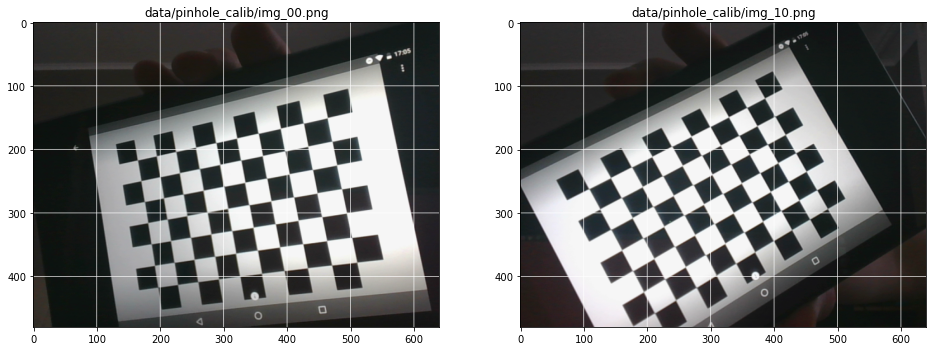

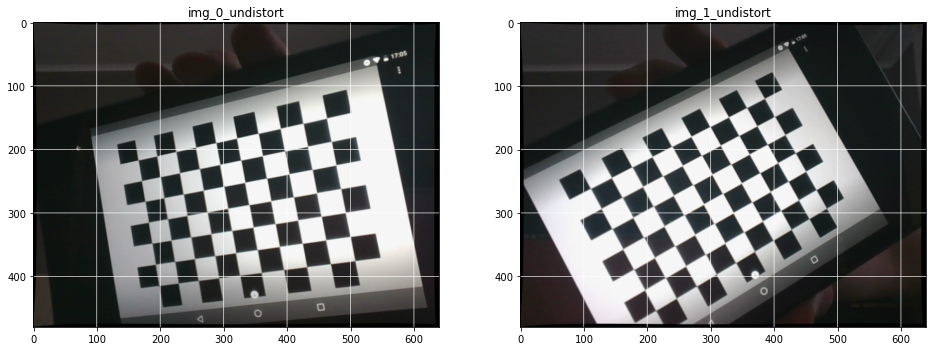

In [2]:
camera_matrix = np.load('data/pinhole_calib/camera_mat.npy')
dist_coefs = np.load('data/pinhole_calib/dist_coefs.npy')

img_0 = cv2.imread('data/pinhole_calib/img_00.png')
img_1 = cv2.imread('data/pinhole_calib/img_10.png')
img_0_undistort = cv2.undistort(img_0, camera_matrix, dist_coefs)
img_1_undistort = cv2.undistort(img_1, camera_matrix, dist_coefs)


#############################################################
print_image('data/pinhole_calib/img_00.png','img_0',img_0,0,2,0,7)
print_image('data/pinhole_calib/img_10.png','img_1',img_1,0,2,0,7)
print_image('img_0_undistort','img_0_undistort',img_0_undistort,0,2,0,7)
print_image('img_1_undistort','img_1_undistort',img_1_undistort,0,2,0,7)

plt_view_image(plt,[["data/pinhole_calib/img_00.png",  
                     draw_grid(np.copy(img_0),100,(255,255,255))[:,:,[2,1,0]]],
                    ["data/pinhole_calib/img_10.png", 
                     draw_grid(np.copy(img_1),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')
plt_view_image(plt,[["img_0_undistort",draw_grid(np.copy(img_0_undistort),100,(255,255,255))[:,:,[2,1,0]]],
                    ["img_1_undistort",draw_grid(np.copy(img_1_undistort),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')

<ipython-input-3-c7fa4107bbb5>:12: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img_0_un, tuple(c[0]), 5, (0, 255, 0), 5)
<ipython-input-3-c7fa4107bbb5>:14: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img_1_un, tuple(c[0]), 5, (255, 0, 0), 5)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


True
------  corners_0----------------    Shape(70, 1, 2) corners_0: float32
[[164.6092  216.80879] ]
[[196.40352 209.99544] ]
[[224.08304 203.48598] ]
[[257.52408 196.19748] ]
[[288.4632  189.91542] ]
[[322.16205 182.31001] ]
[[355.51205 175.40602] ]
True
------  corners_1----------------    Shape(70, 1, 2) corners_1: float32
[[111.289314 262.12796 ] ]
[[144.46918 244.94386] ]
[[176.66023 228.31508] ]
[[208.46176 212.01628] ]
[[239.29413 195.7612 ] ]
[[269.93347 180.12181] ]
[[299.68207 164.69058] ]


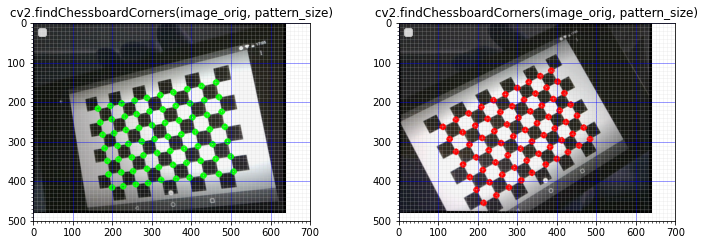

In [3]:
pattern_size = (10, 7)
res_0, corners_0 = cv2.findChessboardCorners(img_0_undistort, pattern_size)
res_1, corners_1 = cv2.findChessboardCorners(img_1_undistort, pattern_size)



#############################################################
img_0_un = np.copy(img_0_undistort)
img_1_un = np.copy(img_1_undistort)

for c in corners_0:
    cv2.circle(img_0_un, tuple(c[0]), 5, (0, 255, 0), 5)
for c in corners_1:
    cv2.circle(img_1_un, tuple(c[0]), 5, (255, 0, 0), 5)
    
print(res_0)
print_image('corners_0','corners_0',corners_0,0,7,0,7)
print(res_1)
print_image('corners_1','corners_1',corners_1,0,7,0,7)


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt_view_grid(plt, 'on',(0,700,0,500),(100,10,100,10),major_color='b')
plt.gca().invert_yaxis()
plt.imshow(img_0_un,cmap='gray' )
plt.title("cv2.findChessboardCorners(image_orig, pattern_size)");
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt_view_grid(plt, 'on',(0,700,0,500),(100,10,100,10),major_color='b')
plt.gca().invert_yaxis()
plt.imshow(img_1_un,cmap='gray' )
plt.title("cv2.findChessboardCorners(image_orig, pattern_size)");
plt.legend(loc='upper left')
plt.show()

<ipython-input-4-3631c2c18373>:13: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img_0_Pix, tuple(c[0]), 5, (0, 255, 0), 5)
<ipython-input-4-3631c2c18373>:15: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img_1_Pix, tuple(c[0]), 5, (255, 0, 0), 5)
No handles with labels found to put in legend.


------  corners_0_Pix------------    Shape(70, 1, 2) corners_0_Pix: float32
[[165.79814 217.4091 ] ]
[[195.37196 210.87863] ]
[[225.43216 204.22684] ]
[[256.587   197.30452] ]
[[288.4746  190.21843] ]
[[321.37976 182.829  ] ]
[[355.19275 175.3648 ] ]
------  corners_1_Pix------------    Shape(70, 1, 2) corners_1_Pix: float32
[[111.256775 262.0947  ] ]
[[144.43716 244.99954] ]
[[176.7559  228.33192] ]
[[208.51627 211.88965] ]
[[239.4193  195.82877] ]
[[269.8699  180.18083] ]
[[299.6163  164.73587] ]


No handles with labels found to put in legend.


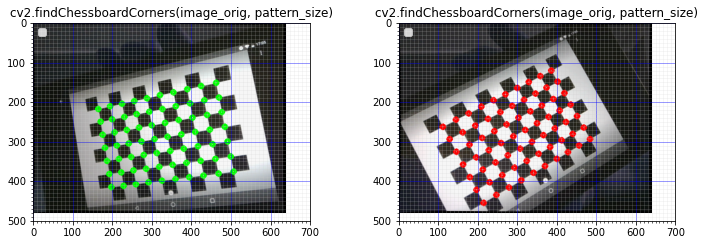

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-3)
corners_0_Pix = cv2.cornerSubPix(cv2.cvtColor(img_0_undistort, cv2.COLOR_BGR2GRAY), 
                                 corners_0, (10, 10), (-1,-1), criteria)
corners_1_Pix = cv2.cornerSubPix(cv2.cvtColor(img_1_undistort, cv2.COLOR_BGR2GRAY), 
                                 corners_1, (10, 10), (-1,-1), criteria)


#############################################################
img_0_Pix = np.copy(img_0_undistort)
img_1_Pix = np.copy(img_1_undistort)

for c in corners_0_Pix:
    cv2.circle(img_0_Pix, tuple(c[0]), 5, (0, 255, 0), 5)
for c in corners_1_Pix:
    cv2.circle(img_1_Pix, tuple(c[0]), 5, (255, 0, 0), 5)

print_image('corners_0_Pix','corners_0_Pix',corners_0_Pix,0,7,0,7)
print_image('corners_1_Pix','corners_1_Pix',corners_1_Pix,0,7,0,7)


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt_view_grid(plt, 'on',(0,700,0,500),(100,10,100,10),major_color='b')
plt.gca().invert_yaxis()
plt.imshow(img_0_Pix,cmap='gray' )
plt.title("cv2.findChessboardCorners(image_orig, pattern_size)");
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt_view_grid(plt, 'on',(0,700,0,500),(100,10,100,10),major_color='b')
plt.gca().invert_yaxis()
plt.imshow(img_1_Pix,cmap='gray' )
plt.title("cv2.findChessboardCorners(image_orig, pattern_size)");
plt.legend(loc='upper left')

plt.show()

In [5]:
H, mask = cv2.findHomography(corners_0, corners_1)


######################################################
print(H)
print_image('mask','mask',mask,0,7,0,7)

[[ 1.47560231e+00  3.42657587e-01 -1.94333950e+02]
 [-1.71148404e-01  1.13004934e+00  7.69585798e+01]
 [ 9.12956249e-04 -1.32133106e-04  1.00000000e+00]]
------  mask---------------------    Shape(70, 1) mask: uint8
[ 1 ]
[ 1 ]
[ 1 ]
[ 1 ]
[ 1 ]
[ 1 ]
[ 1 ]


In [6]:
ret, rmats, tvecs, normals = cv2.decomposeHomographyMat(H, camera_matrix)


##############################################
print("ret ==",ret)
print("rmats ==\n",rmats)
print("tvecs ==\n",tvecs)
print("normals ==\n",normals)

ret == 4
rmats ==
 [array([[ 0.86947708,  0.31377656, -0.38151525],
       [-0.25852826,  0.94717197,  0.18981148],
       [ 0.42091894, -0.06640426,  0.90466442]]), array([[ 0.86947708,  0.31377656, -0.38151525],
       [-0.25852826,  0.94717197,  0.18981148],
       [ 0.42091894, -0.06640426,  0.90466442]]), array([[ 0.94628417,  0.31728121, -0.0622809 ],
       [-0.31888829,  0.94762956, -0.01756372],
       [ 0.05344658,  0.03648091,  0.99790411]]), array([[ 0.94628417,  0.31728121, -0.0622809 ],
       [-0.31888829,  0.94762956, -0.01756372],
       [ 0.05344658,  0.03648091,  0.99790411]])]
tvecs ==
 [array([[ 0.33182587],
       [-0.21449142],
       [ 0.13652764]]), array([[-0.33182587],
       [ 0.21449142],
       [-0.13652764]]), array([[0.01058683],
       [0.00425672],
       [0.41788105]]), array([[-0.01058683],
       [-0.00425672],
       [-0.41788105]])]
normals ==
 [array([[0.26225789],
       [0.00273505],
       [0.96499395]]), array([[-0.26225789],
       [-0.00273